# Flagging Loans Project by Yusuf Abdul

I have a dataset containing information on thousands of loans, including features like loan details, age, past billings, credit score, etc. The target variable indicates whether the loan was flagged or not. I will be building a variety of machine learning models to predict whether a loan application should be flagged or not.

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
# fixing a random seed for reproducible results
RANDOM_SEED = 42

In [3]:
# importing the dataset
data = pd.read_csv("test_task.csv")

In [4]:
# we have 4157 rows and 22 columns
data.shape

(4157, 22)

In [5]:
# prints a (pseudo-)random sample of 10 rows
data.sample(n=10, random_state=RANDOM_SEED)

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
2481,798820,2016-11-07,2015-09-07,NaN,NaN,NaN,NaN,7.0,region_3,6,...,16,0,0,0,14.0,550.235369,NaN,43.0,False,0
308,612648,2016-08-18,2016-02-08,NaN,NaN,NaN,NaN,1.0,region_6,12,...,0,2,0,0,6.0,NaN,576.875277,26.0,False,0
2414,452498,2016-04-20,2016-03-12,NaN,NaN,NaN,NaN,0.0,region_2,12,...,0,2,1,0,1.0,561.999471,NaN,28.0,True,1
2720,580963,2016-07-22,2015-08-14,NaN,NaN,NaN,NaN,1.0,region_6,26,...,5,6,0,0,10.0,590.376406,NaN,30.0,False,0
463,518998,2016-06-01,2015-09-29,NaN,NaN,NaN,NaN,1.0,region_3,6,...,8,0,0,0,8.0,593.493342,NaN,47.0,False,0
1185,295047,2015-12-23,2015-12-22,NaN,NaN,NaN,NaN,NaN,region_2,6,...,0,0,0,0,NaN,NaN,NaN,19.0,False,0
96,247067,2015-11-17,2015-10-15,NaN,NaN,NaN,NaN,0.0,region_3,12,...,0,0,0,0,1.0,601.979112,NaN,27.0,False,1
2031,388069,2016-03-16,2015-10-10,NaN,NaN,NaN,NaN,1.0,region_3,6,...,2,0,0,0,3.0,NaN,NaN,24.0,False,0
1886,736698,2016-10-16,2015-10-16,2.0,1.0,0.0,2015-12-20,2.0,region_6,6,...,5,0,0,0,5.0,NaN,NaN,20.0,False,1
843,628262,2016-08-28,2015-08-08,NaN,NaN,NaN,NaN,1.0,region_3,38,...,3,0,0,0,3.0,634.387608,NaN,46.0,False,0


In [6]:
# prints number of non-null values and type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loanKey              4157 non-null   int64  
 1   rep_loan_date        4157 non-null   object 
 2   first_loan           4157 non-null   object 
 3   dpd_5_cnt            675 non-null    float64
 4   dpd_15_cnt           675 non-null    float64
 5   dpd_30_cnt           675 non-null    float64
 6   first_overdue_date   675 non-null    object 
 7   close_loans_cnt      4142 non-null   float64
 8   federal_district_nm  4146 non-null   object 
 9   TraderKey            4157 non-null   int64  
 10  payment_type_0       4157 non-null   int64  
 11  payment_type_1       4157 non-null   int64  
 12  payment_type_2       4157 non-null   int64  
 13  payment_type_3       4157 non-null   int64  
 14  payment_type_4       4157 non-null   int64  
 15  payment_type_5       4157 non-null   i

In [7]:
# we manually select numerical columns to describe,
# but we intentionally ignore the target variable (bag_flag) and 'key' columns
data[[
    "dpd_5_cnt",
    "dpd_15_cnt",
    "dpd_30_cnt",
    "close_loans_cnt",
    "payment_type_0",
    "payment_type_1",
    "payment_type_2",
    "payment_type_3",
    "payment_type_4",
    "payment_type_5",
    "past_billings_cnt",
    "score_1",
    "score_2",
    "age"
]].describe()

,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age
count,675.000000,675.000000,675.000000,4142.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.0,3909.000000,3507.000000,239.000000,4157.000000
mean,1.444444,0.733333,0.280000,1.184693,0.018523,0.596103,3.755834,0.758239,0.019485,0.0,4.979023,578.911345,552.546610,34.561222
std,0.900599,0.764572,0.502339,1.723715,0.330359,2.564887,3.810703,2.212487,0.245960,0.0,3.491556,48.989869,21.492840,10.834143
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,384.220628,485.874267,18.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,2.000000,547.429791,535.545724,26.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,4.000000,588.531315,556.757944,32.000000
75%,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,6.000000,612.323090,567.608057,41.000000
max,7.000000,5.000000,3.000000,31.000000,15.000000,81.000000,33.000000,35.000000,7.000000,0.0,21.000000,691.528420,603.311653,74.000000


In [8]:
# next, we 'describe' the categorical columns
# note that the output differs between the two calls to `.describe()`
data[[
    "federal_district_nm",
    "gender"
]].describe()

,federal_district_nm,gender
count,4146,4157
unique,8,2
top,region_3,False
freq,1595,3570


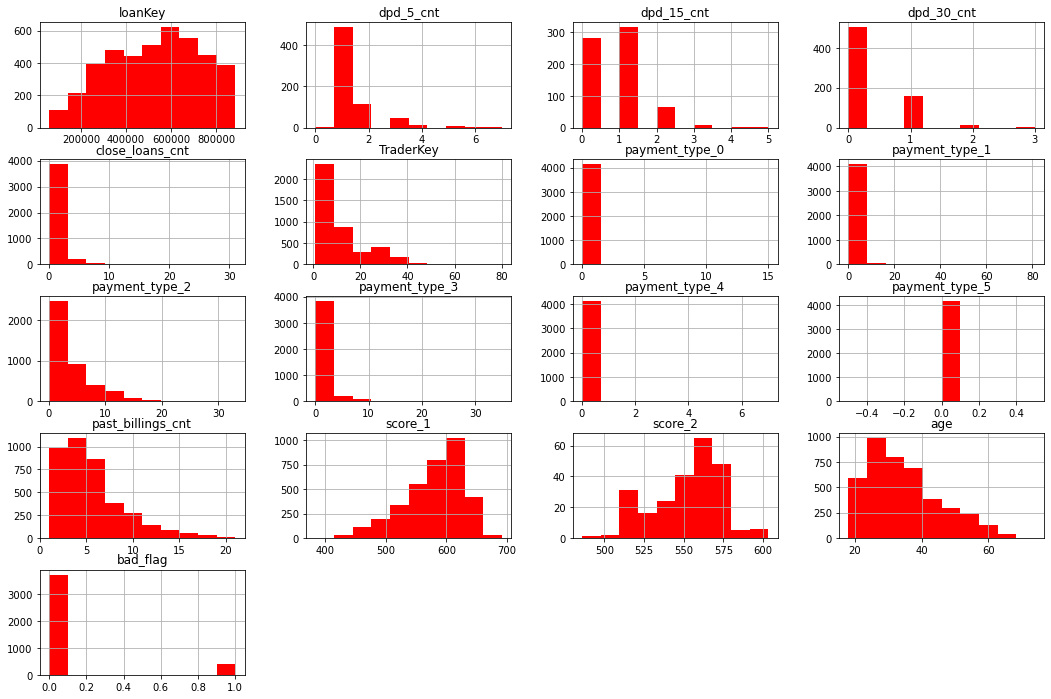

In [9]:
_ = data.hist(figsize=(18, 12), color="red")

In [10]:
# target variable distribution
data["bad_flag"].value_counts()

0    3740
1     417
Name: bad_flag, dtype: int64

In the cell below, we plot the distribution of `score_2` conditioned by the value of the target variable, so that we can see how the positive and negative examples are distributed with respect to `score_2`. I will try experimenting with different columns and different method arguments, and see if I can extract some useful insights.

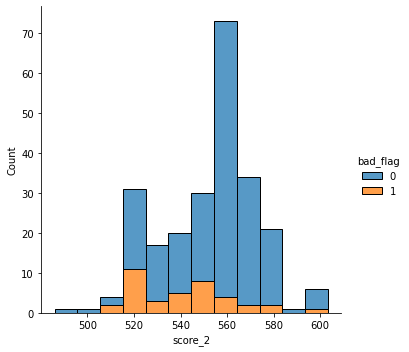

In [11]:
from seaborn import displot

_ = displot(data=data, x="score_2", hue="bad_flag", multiple="stack")

## Feature Engineering

When working with temporal data, and you have dates in your features, a common consideration is to take the date difference as a feature (how much time it took between events).

In [12]:
# calculate difference in days between the first and the repeated loan
data[["rep_loan_date", "first_loan"]] = data[["rep_loan_date", "first_loan"]].apply(pd.to_datetime)
data["days_between_rep_and_first_loan"] = (data["rep_loan_date"] - data["first_loan"]).dt.days

In [13]:
data

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag,days_between_rep_and_first_loan
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,...,0,0,0,10.0,NaN,NaN,21.0,False,0,328
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,0,0,0,5.0,NaN,NaN,20.0,False,0,180
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,...,5,0,0,5.0,NaN,NaN,19.0,False,0,314
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,...,0,0,0,6.0,NaN,NaN,21.0,False,0,365
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,...,0,0,0,3.0,NaN,NaN,33.0,False,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,533637,2016-06-11,2016-05-17,NaN,NaN,NaN,NaN,0.0,region_5,7,...,0,0,0,NaN,NaN,563.089780,26.0,False,0,25
4153,596156,2016-08-06,2016-03-11,NaN,NaN,NaN,NaN,1.0,region_2,12,...,0,0,0,3.0,NaN,576.875277,38.0,False,1,148
4154,645359,2016-09-05,2016-04-30,NaN,NaN,NaN,NaN,1.0,region_2,12,...,0,0,0,4.0,NaN,554.816921,21.0,False,0,128
4155,730681,2016-10-14,2016-05-20,NaN,NaN,NaN,NaN,0.0,region_6,7,...,0,0,0,4.0,NaN,563.089780,35.0,False,0,147


Next, we have the categorical variables. We have two in our data: gender and federal_region. The gender can be directly input into the model - it should get mapped to True -> 1 and False -> 0. For the federal regions, for which we have eight possible values, we can use the pandas' get_dummies() method to generate 'dummy' columns for it.

In [14]:
federal_districts = pd.get_dummies(data["federal_district_nm"], prefix="federal")

In [15]:
federal_districts

,federal_region_0,federal_region_1,federal_region_2,federal_region_3,federal_region_4,federal_region_5,federal_region_6,federal_region_7
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
4152,0,0,0,0,0,1,0,0
4153,0,0,1,0,0,0,0,0
4154,0,0,1,0,0,0,0,0
4155,0,0,0,0,0,0,1,0


Let's add the "dummy" variables to the original DataFrame. Then, we fill the NaN values with zero as the last pre-processing step and continue with the algorithm selection step.

In [16]:
data = pd.concat(objs=[data, federal_districts], axis=1)

In [17]:
# since most of the classifiers we're evaluating don't accept NaN values,
# we're replacing them with zeros - a neutral value
data.fillna(value=0, inplace=True)

In [18]:
data.sample(n=7, random_state=RANDOM_SEED)

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,bad_flag,days_between_rep_and_first_loan,federal_region_0,federal_region_1,federal_region_2,federal_region_3,federal_region_4,federal_region_5,federal_region_6,federal_region_7
2481,798820,2016-11-07,2015-09-07,0.0,0.0,0.0,0,7.0,region_3,6,...,0,427,0,0,0,1,0,0,0,0
308,612648,2016-08-18,2016-02-08,0.0,0.0,0.0,0,1.0,region_6,12,...,0,192,0,0,0,0,0,0,1,0
2414,452498,2016-04-20,2016-03-12,0.0,0.0,0.0,0,0.0,region_2,12,...,1,39,0,0,1,0,0,0,0,0
2720,580963,2016-07-22,2015-08-14,0.0,0.0,0.0,0,1.0,region_6,26,...,0,343,0,0,0,0,0,0,1,0
463,518998,2016-06-01,2015-09-29,0.0,0.0,0.0,0,1.0,region_3,6,...,0,246,0,0,0,1,0,0,0,0
1185,295047,2015-12-23,2015-12-22,0.0,0.0,0.0,0,0.0,region_2,6,...,0,1,0,0,1,0,0,0,0,0
96,247067,2015-11-17,2015-10-15,0.0,0.0,0.0,0,0.0,region_3,12,...,1,33,0,0,0,1,0,0,0,0


## Algorithm Selection

The problem we are facing is binary classification - we are trying to predict whether a customer is 'bad'. In this section, we will try different classifiers from the scikit-learn library.

Precision, recall, and F1 score and the most common metrics for evaluating classifiers.

In the following few cells, we are going to build a few classifiers and evaluate them - first on the F1 score, and later on all three aforementioned metrics in a more visual and intuitive format.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [20]:
# define the numerical input columns
X_columns = [
    "dpd_5_cnt",
    "dpd_15_cnt",
    "dpd_30_cnt",
    "close_loans_cnt",
    "payment_type_0",
    "payment_type_1",
    "payment_type_2",
    "payment_type_3",
    "payment_type_4",
    "past_billings_cnt",
    "score_1",
    "score_2",
    "age",
    "days_between_rep_and_first_loan",
    "gender"
]

# append to them the categorical ones
X_columns = X_columns + list(federal_districts.columns)

In [21]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(data[X_columns], data["bad_flag"],
                                                    test_size=0.2,
                                                    stratify=data["bad_flag"],
                                                    random_state=RANDOM_SEED)

Small note here. The hyperparameters for the classifiers are set randomly at this point. In a later section, we perform hyperparameter optimization, which, is highly recommended in any real-world project and is a highly-valued skill.

In [22]:
# defining the classifiers in an array
classifiers = [
    SGDClassifier(max_iter=1000, tol=1e-3, random_state=RANDOM_SEED),
    KNeighborsClassifier(),
    LogisticRegression(solver="lbfgs", random_state=RANDOM_SEED),
    LogisticRegressionCV(cv=3, random_state=RANDOM_SEED),
    BaggingClassifier(random_state=RANDOM_SEED),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED),
    ExtraTreesClassifier(n_estimators=100, random_state=RANDOM_SEED)
]

In [23]:
# iterate over the array of classifiers and print their evaluation
for classifier in classifiers:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.23841059602649006
KNeighborsClassifier : 0.2018348623853211
LogisticRegression : 0.06521739130434782
LogisticRegressionCV : 0.0
BaggingClassifier : 0.12612612612612611
GaussianNB : 0.22459893048128343
RandomForestClassifier : 0.18181818181818182
ExtraTreesClassifier : 0.15686274509803924


In [24]:
from yellowbrick.classifier import ClassificationReport

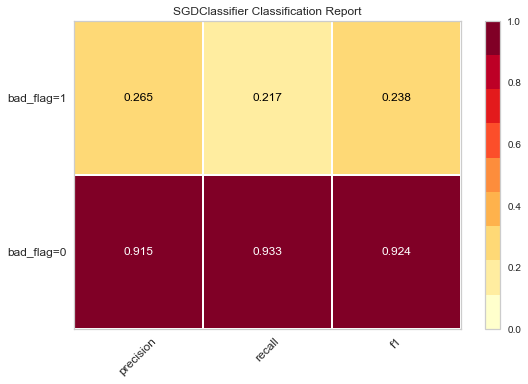

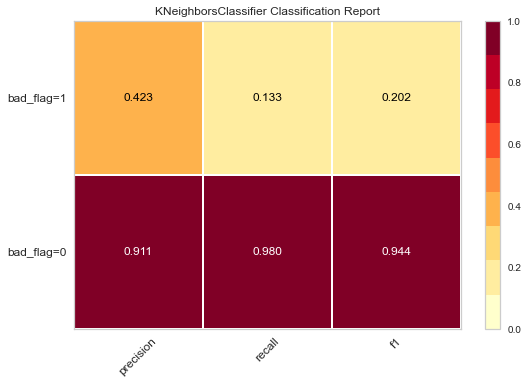

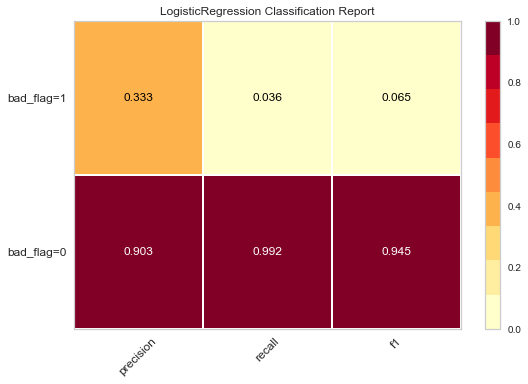

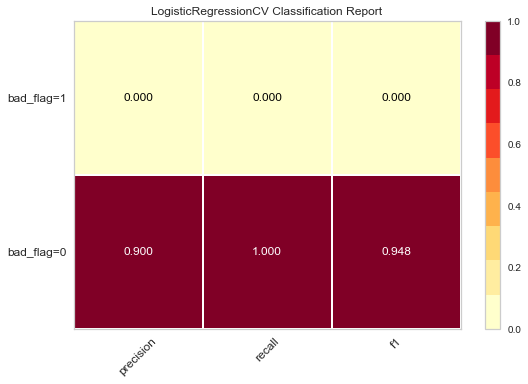

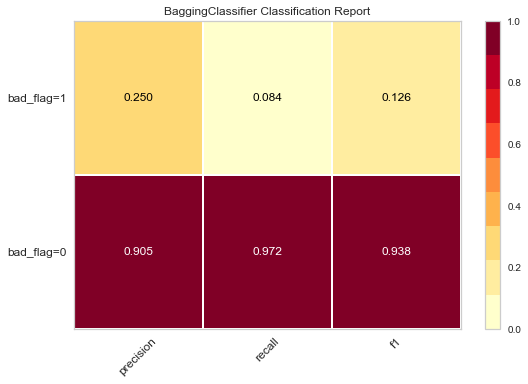

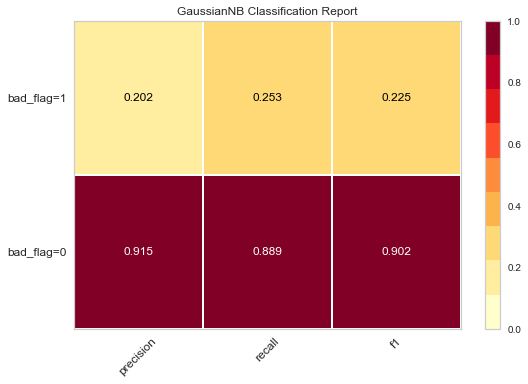

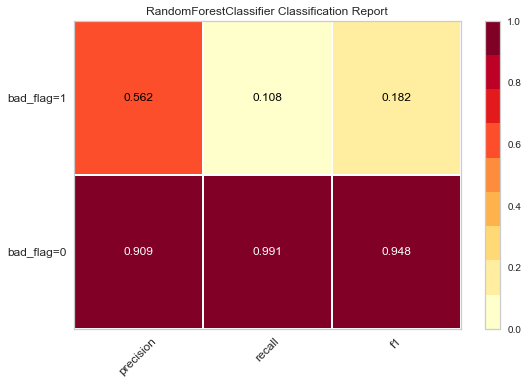

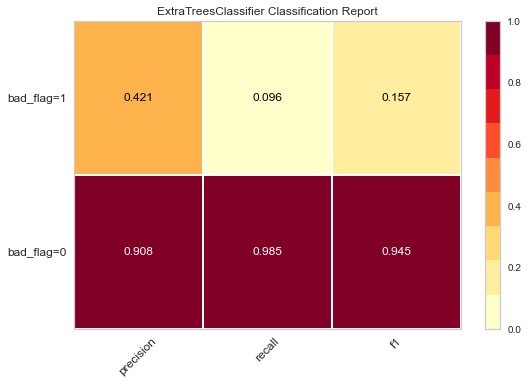

In [25]:
for classifier in classifiers:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

## Addressing Class-Imbalance
The challenge with class-imbalanced data sets is that most machine learning algorithms ignore, or perform poorly on the minority class, which often is the most important class. To address the class imbalance, numerous methods have been developed. Amongst others, the most popular seem to be the following:

Over-sampling the minority class
Under-sampling the majority class
Assigning class weights to the data samples
Synthetically generating new data, e.g., SMOTE
The goal of these methods is to bring more balanced class distribution into the data, in the hope that it will improve the performance of a machine learning algorithm, i.e., we would be able to build a better model.

In [26]:
## under-sampling
pos_examples = data["bad_flag"].sum()
neg_examples = data.shape[0] - pos_examples

print("Positive examples", pos_examples, ", negative examples", neg_examples)

# we keep all positive examples
pos = data[data["bad_flag"] == 1]
# we use pandas' sample method to take randomly 20% of the negative / majority class
neg = data[data["bad_flag"] == 0].sample(frac=0.2, random_state=RANDOM_SEED)

print("Negative examples after under-sampling", neg.shape[0])

# concatenating the positive and sub-sampled negative examples
data = pd.concat(objs=[pos, neg])

print("Final data shape", data.shape)

Positive examples 417 , negative examples 3740
Negative examples after under-sampling 748
Final data shape (1165, 31)


In [27]:
# perform another train / test split with the new sampled data
X_train, X_test, y_train, y_test = train_test_split(data[X_columns], data["bad_flag"],
                                                    test_size=0.2,
                                                    stratify=data["bad_flag"],
                                                    random_state=RANDOM_SEED)

Now, let's again iterate over our set of classifiers and see how they perform on the new, sub-sampled data.

In [28]:
# iterate over the array of classifiers and print their evaluation
for classifier in classifiers:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.5253164556962026
KNeighborsClassifier : 0.6211180124223603
LogisticRegression : 0.4461538461538462
LogisticRegressionCV : 0.4892086330935252
BaggingClassifier : 0.576923076923077
GaussianNB : 0.42953020134228187
RandomForestClassifier : 0.5974025974025975
ExtraTreesClassifier : 0.5789473684210525


All classifiers seem to have improved performance, with the KNeighbors classifier reaching an F1 score of 0.62! Let's visualize also the confusion matrices.



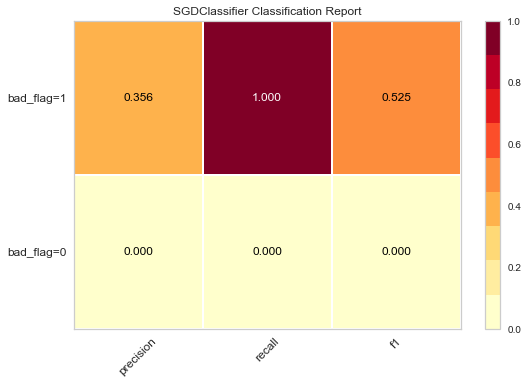

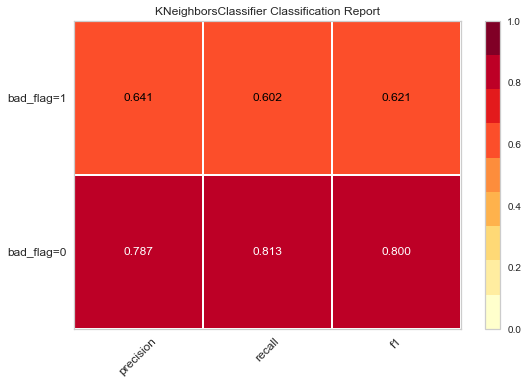

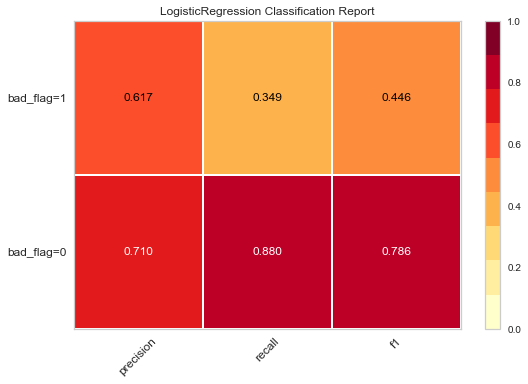

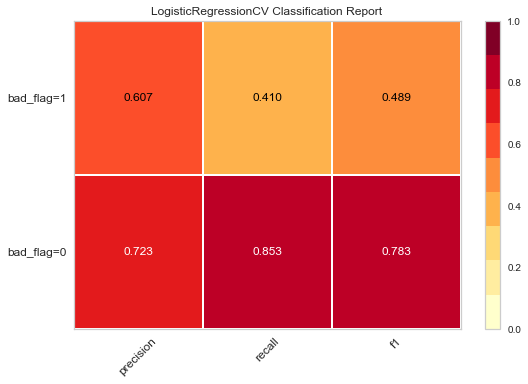

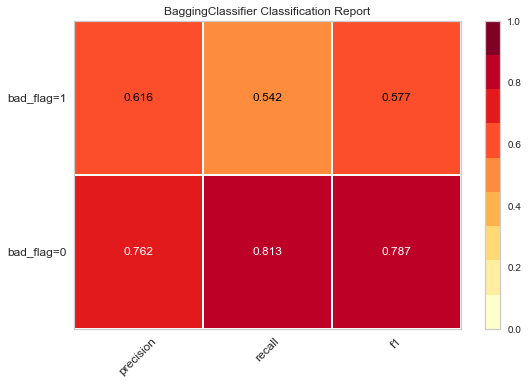

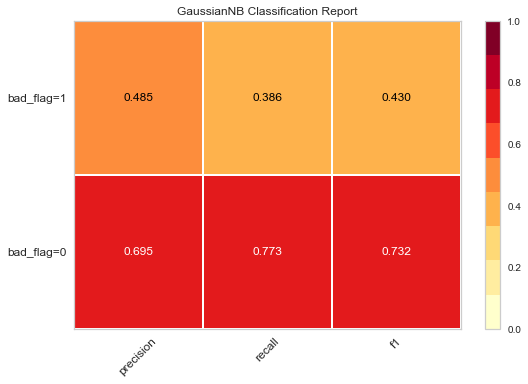

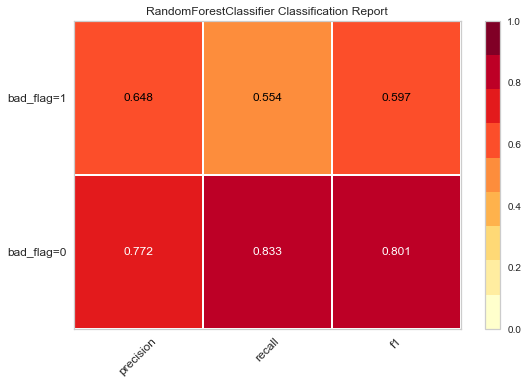

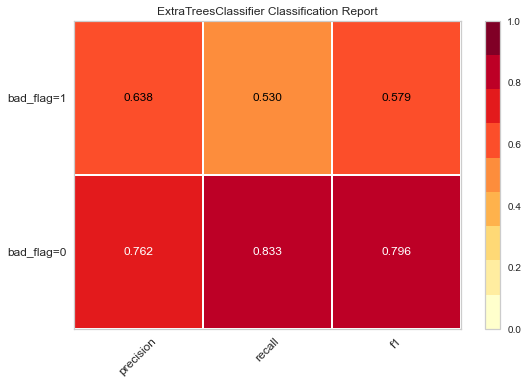

In [29]:
for classifier in classifiers:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

## Hyperparameter Optimisation
Upon examining the classification reports, we have determined that the KNeighbors exhibits the best performance overall.

All models score similarly for the negative (majority) class, and the KNeighbors algorithm gives the highest F1 score for the positive (minority) class.

In this section, we will try to further improve the algorithm by modifying some of its hyperparameters.

We will use the Optuna framework. Choosing which hyperparameters to tune requires in-depth knowledge of the workings of a particular algorithm.

For our KNeighbors classifier we have decided to modify the:

The number of neighbors used during inference
The weight function used for prediction
The algorithm used to compute the nearest neighbors

In [30]:
import optuna

In [31]:
def objective(trial: optuna.Trial):
    """The objective function that we will try to maximize."""
    # suggest min. and max. values for the parameters that we want to tune
    n_neighbors = trial.suggest_int(name="n_neighbors", low=1, high=10)
    weights = trial.suggest_categorical(name="weights", choices=["uniform", "distance"])
    algorithm = trial.suggest_categorical(name="algorithm", choices=["ball_tree", "kd_tree", "brute"])
    leaf_size = trial.suggest_int(name="leaf_size", low=1, high=40)
    p = trial.suggest_categorical(name="p", choices=[1, 2])

    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size, p=p)

    classifier = classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    return f1_score(y_true=y_test, y_pred=y_pred)

In [32]:
# make the sampler behave in a deterministic way.
sampler = optuna.samplers.TPESampler(seed=RANDOM_SEED)
study = optuna.create_study(direction='maximize', study_name="KNeigbors", sampler=sampler)
study.optimize(objective, n_trials=10)

[I 2023-07-03 11:33:19,536] A new study created in memory with name: KNeigbors
[I 2023-07-03 11:33:19,549] Trial 0 finished with value: 0.5594405594405594 and parameters: {'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 3, 'p': 1}. Best is trial 0 with value: 0.5594405594405594.
[I 2023-07-03 11:33:19,556] Trial 1 finished with value: 0.5974025974025975 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 8, 'p': 2}. Best is trial 1 with value: 0.5974025974025975.
[I 2023-07-03 11:33:19,566] Trial 2 finished with value: 0.6250000000000001 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 19, 'p': 1}. Best is trial 2 with value: 0.6250000000000001.
[I 2023-07-03 11:33:19,577] Trial 3 finished with value: 0.5594405594405594 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 38, 'p': 1}. Best is trial 2 with value: 0.62500000000

In [33]:
study.best_params

{'n_neighbors': 5,
 'weights': 'distance',
 'algorithm': 'brute',
 'leaf_size': 19,
 'p': 1}

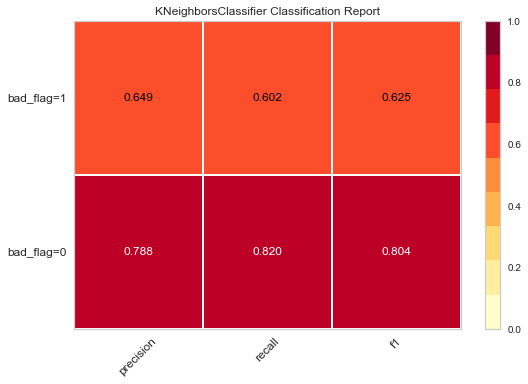

In [34]:
visualizer = ClassificationReport(KNeighborsClassifier(**study.best_params), classes=["bad_flag=0", "bad_flag=1"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
_ = visualizer.show()

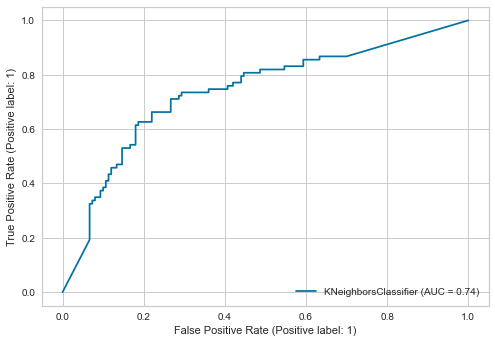

In [35]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

clf = KNeighborsClassifier(**study.best_params)
clf.fit(X_train, y_train)
_ = plot_roc_curve(clf, X_test, y_test)

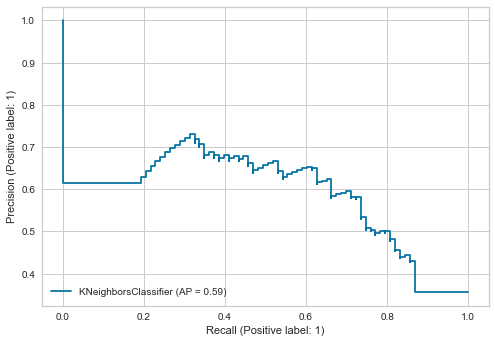

In [36]:
# useful addition to the ROC plot is the precision-recall curve
_ = plot_precision_recall_curve(clf, X_test, y_test)

# XGBoost

It's time to create the XGBoost model! I will be using the scikit-learn .fit() / .predict() as the xgboost library has a scikit-learn compatible API!

In [37]:
# Import xgboost
import xgboost as xgb
import numpy as np

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.703863


## Decision Tree Model

In [38]:
from sklearn.tree import DecisionTreeClassifier


# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4, random_state=123)

# Fit the classifier to the training set
dt_clf_4.fit(X_train, y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

accuracy: 0.6995708154506438


In [39]:
X = data[X_columns]

In [40]:
y = data['bad_flag']

### Manually tuning the boosting rounds using cv

In [41]:

df_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary for each tree: params 
params = {"objective":"binary:logistic", "max_depth":3}

num_rounds = [5, 10, 15]

# Empty list to store final round error per XGBoost model
final_error_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:
    # Performing cross-validation: cv_results
    cv_results = xgb.cv(dtrain=df_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="error", as_pandas=True, seed=123)
    # Appending final round error
    final_error_per_round.append(cv_results["test-error-mean"].tail().values[-1])
# Printing the resultant DataFrame
num_rounds_errors = list(zip(num_rounds, final_error_per_round))
print(pd.DataFrame(num_rounds_errors,columns=["num_boosting_rounds","error"]))


   num_boosting_rounds     error
0                    5  0.255769
1                   10  0.252332
2                   15  0.243757


Let's break it down:

- When I ran the model with 5 boosting rounds, the average error rate across the 3 folds of cross-validation was approximately 0.256, or 25.6%. This means that, on average, my model incorrectly predicted the class for about 25.6% of the observations in the validation fold.

- When I increased the number of boosting rounds to 10, the average error rate dropped slightly to around 0.252 or 25.2%. By allowing my model to learn from its errors for a few more rounds, it was able to make slightly more accurate predictions.

- Finally, when I ran the model with 15 boosting rounds, the error rate decreased further to around 0.244, or 24.4%. So, my model's predictions became even more accurate with more boosting rounds.

These results suggest that increasing the number of boosting rounds can help improve the model's accuracy, at least up to a certain point. However, there's a balance to be struck, because more boosting rounds means more computational time and resources, and there's also the risk of overfitting if I use too many boosting rounds.


## Automated boosting round selection using early_stopping

Now, instead of attempting to cherry pick the best possible number of boosting rounds, I can very easily have XGBoost automatically select the number of boosting rounds for me within `xgb.cv()`. This is done using a technique called `early stopping`.

In [42]:
# Create the parameter dictionary for each tree: params
params = {"objective":"binary:logistic", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=df_dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, 
                    metrics="error", as_pandas=True, seed=123)
print(cv_results)


   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.221029         0.003930         0.264351        0.022143
1          0.200845         0.021839         0.260062        0.021029
2          0.193980         0.019624         0.255771        0.022893
3          0.181965         0.015677         0.250616        0.022741


## Tuning Max_depth

In [43]:
params = {"objective":"binary:logistic"}

max_depths = [2,5,10,20]
best_err = []

for curr_val in max_depths:
    params["max_depth"] = curr_val
    cv_results = xgb.cv(dtrain=df_dmatrix, params=params, nfold=2, 
                num_boost_round=10, early_stopping_rounds = 5, metrics="error", as_pandas=True, seed=123)
    
    best_err.append(cv_results["test-error-mean"].tail().values[-1])

print(pd.DataFrame(list(zip(max_depths, best_err)),columns=["max_depth","best_error"]))


   max_depth  best_error
0          2    0.266077
1          5    0.266086
2         10    0.260928
3         20    0.267811


Based on the results, it looks like the best model (in terms of lowest error) was achieved with a max_depth of 10, which had an error of approximately 0.261, or 26.1%. This means that, on average, the model incorrectly predicted the class for about 26.1% of the observations in the validation fold.

## Grid Search 

Now that I've learned how to tune parameters individually with XGBoost, I'm going to take my parameter tuning to the next level by using scikit-learn's GridSearch and RandomizedSearch capabilities with internal cross-validation using the GridSearchCV and RandomizedSearchCV functions.

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2,5]
}

# Instantiate the classifier: gbm
gbm = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Perform grid search: grid_acc
grid_acc = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, 
                        scoring='accuracy', cv=4, verbose=1)

grid_acc.fit(X, y)

print("Best parameters found: ", grid_acc.best_params_)
print("Highest accuracy found: ", grid_acc.best_score_)


Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best parameters found:  {'colsample_bytree': 0.3, 'max_depth': 2, 'n_estimators': 50}
Highest accuracy found:  0.744209857364779


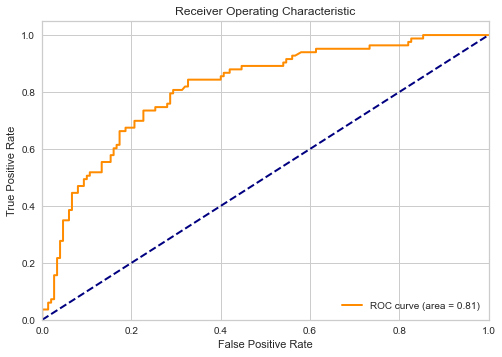

In [45]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


# Split your data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Instantiate the classifier with optimal hyperparameters
gbm_optimal = xgb.XGBClassifier(
    colsample_bytree=0.3, 
    max_depth=2, 
    n_estimators=50
)

# Fit the model to the training data
gbm_optimal.fit(X_train, y_train)

# Predict the probabilities of the positive class for the validation data
y_val_prob = gbm_optimal.predict_proba(X_val)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Random Search 

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the classifier: gbm
gbm = xgb.XGBClassifier(n_estimators=10, use_label_encoder=False, eval_metric='logloss')

# Perform random search: randomized_acc
randomized_acc = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid, 
                                    scoring='accuracy', n_iter=5, cv=4, verbose=1)

# Fit randomized_acc to the data
randomized_acc.fit(X, y)

# Print the best parameters and highest accuracy
print("Best parameters found: ", randomized_acc.best_params_)
print("Highest accuracy found: ", randomized_acc.best_score_)


Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters found:  {'n_estimators': 25, 'max_depth': 3}
Highest accuracy found:  0.7381931695146636


## Bayesian Optimization

In [56]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
import time
import xgboost as xgb
import mlflow
import mlflow.xgboost
import sklearn.metrics 
from sklearn.metrics import roc_auc_score 
from hyperopt.pyll import scope 



dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


# objective function

def train_model(params):
    
    mlflow.xgboost.autolog(silent = True)
    
    with mlflow.start_run(nested =True):
        
        start_time = time.time()
        booster = xgb.train(params=params, dtrain =dtrain, num_boost_round = 500, evals=[(dtest, "test")],
                           early_stopping_rounds = 50, verbose_eval =False)
        run_time = time.time() - start_time
        
        mlflow.log_metric('runtime', run_time)
        
        predictions_test = booster.predict(dtest)
        auc_score = roc_auc_score(y_test, predictions_test)
        
        return {'status': STATUS_OK, 'loss': -auc_score, 'booster': booster.attributes()}
    
    
 #Defining the hyperparameter configuration space
search_space = {
    'learning_rate': hp.loguniform('learning_rate', -7, 0),
    'max_depth': scope.int(hp.quniform('max_depth', 1, 100, 1)),
    'min_child_weight': hp.loguniform('min_child_weight', -2, 3),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'gamma': hp.loguniform('gamma', -10, 10),
    'alpha': hp.loguniform('alpha', -10, 10),
    'lambda': hp.loguniform('lambda', -10, 10),
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 123,
}

        
run_best = fmin(fn=train_model, space= search_space, algo = tpe.suggest, max_evals = 50)

model = xgb.train(params=params, dtrain=dtrain, num_boost_round=500, evals=[(dtest, "test")], 
                  early_stopping_rounds=50, verbose_eval=False)

predict = model.predict(dtest)
auc_score = roc_auc_score(y_test, predict)

print("The best parameter is: ", run_best)
print("The AUC score is", auc_score)

100%|████████| 50/50 [01:31<00:00,  1.84s/trial, best loss: -0.9945381526104418]
The best parameter is:  {'alpha': 0.0001389316372774708, 'colsample_bytree': 0.9986664060538263, 'gamma': 4.59831893651258e-05, 'lambda': 0.05130163492650386, 'learning_rate': 0.1065156964748095, 'max_depth': 19.0, 'min_child_weight': 0.5425242611129283, 'subsample': 0.9283293836977276}
The AUC score is 0.9916465863453815


# Calibration

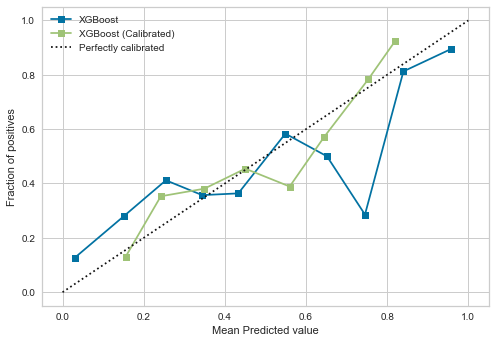

In [57]:
import xgboost as xgb
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
import matplotlib.pyplot as plt

# Train an XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the validation or test data
preds = model.predict_proba(X_val)[:, 1]

# Calculate the calibration curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_val, preds, n_bins=10)

# Plot the calibration curve
plt.plot(mean_predicted_value, fraction_of_positives, 's-', label="XGBoost")

# Optionally, calibrate the predicted probabilities
calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
calibrated_model.fit(X_val, y_val)  # Fit the calibration model to the validation data
calibrated_preds = calibrated_model.predict_proba(X_val)[:, 1]

# Calculate the calibration curve for the calibrated model
fraction_of_positives_calibrated, mean_predicted_value_calibrated = calibration_curve(y_val, calibrated_preds, n_bins=10)

# Plot the calibration curve for the calibrated model
plt.plot(mean_predicted_value_calibrated, fraction_of_positives_calibrated, 's-', label="XGBoost (Calibrated)")

# Plot the perfect calibration line
plt.plot([0, 1], [0, 1], 'k:', label="Perfectly calibrated")

plt.xlabel("Mean Predicted value")
plt.ylabel("Fraction of positives")
plt.legend()
plt.show()


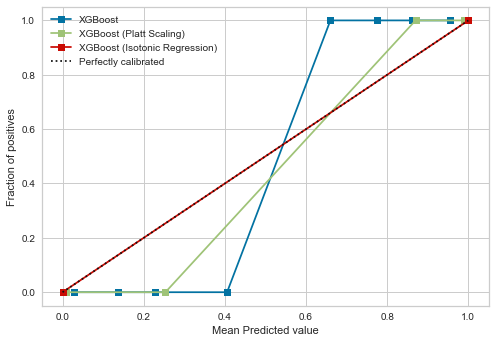

In [60]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

preds = model.predict_proba(X_val)[:, 1]

# Calculate the calibration curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_val, preds, n_bins=10)

# Plot the calibration curve
plt.plot(mean_predicted_value, fraction_of_positives, 's-', label="XGBoost")

calibrated_model_platt = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
calibrated_model_platt.fit(X_val, y_val)  # fitting the calibration model to the validation data
calibrated_preds_platt = calibrated_model_platt.predict_proba(X_val)[:, 1]

fraction_of_positives_calibrated_platt, mean_predicted_value_calibrated_platt = calibration_curve(y_val, calibrated_preds_platt, n_bins=10)

# Plot the calibration curve for the calibrated model
plt.plot(mean_predicted_value_calibrated_platt, fraction_of_positives_calibrated_platt, 's-', label="XGBoost (Platt Scaling)")

calibrated_model_iso = CalibratedClassifierCV(model, method='isotonic', cv='prefit')
calibrated_model_iso.fit(X_val, y_val)
calibrated_preds_iso = calibrated_model_iso.predict_proba(X_val)[:, 1]

fraction_of_positives_calibrated_iso, mean_predicted_value_calibrated_iso = calibration_curve(y_val, calibrated_preds_iso, n_bins=10)

plt.plot(mean_predicted_value_calibrated_iso, fraction_of_positives_calibrated_iso, 's-', label="XGBoost (Isotonic Regression)")

plt.plot([0, 1], [0, 1], 'k:', label="Perfectly calibrated")

plt.xlabel("Mean Predicted value")
plt.ylabel("Fraction of positives")
plt.legend()
plt.show()

# Nested Cross Validation

In [58]:
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
}

# Create a KFold object
inner_cv = KFold(n_splits=4, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=42)

# Nested cross-validation
outer_scores = []
for train_index, test_index in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Inner cross-validation to find best hyperparameters
    clf = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
                       param_grid=param_grid, cv=inner_cv)
    clf.fit(X_train, y_train)
    
    # Evaluate model on the hold out dataset
    score = clf.score(X_test, y_test)
    outer_scores.append(score)

# Print the mean of the scores from the outer cross-validation
print('Nested Cross Validation Score: ', np.mean(outer_scores))


Nested Cross Validation Score:  0.7484700842630514
